<a href="https://colab.research.google.com/github/AMAYadav/PROJECTS-/blob/main/factor_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pip install yfinance
import yfinance as yf

     |████████████████████████████████| 6.3 MB 29.6 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


Factor Modelling - To explain the Excess Returns of a portfolio or Assets using factors
 

In [ ]:
asset='BAJAJ-AUTO.NS';start='2018-04-01';end= '2019-12-31'

Legend


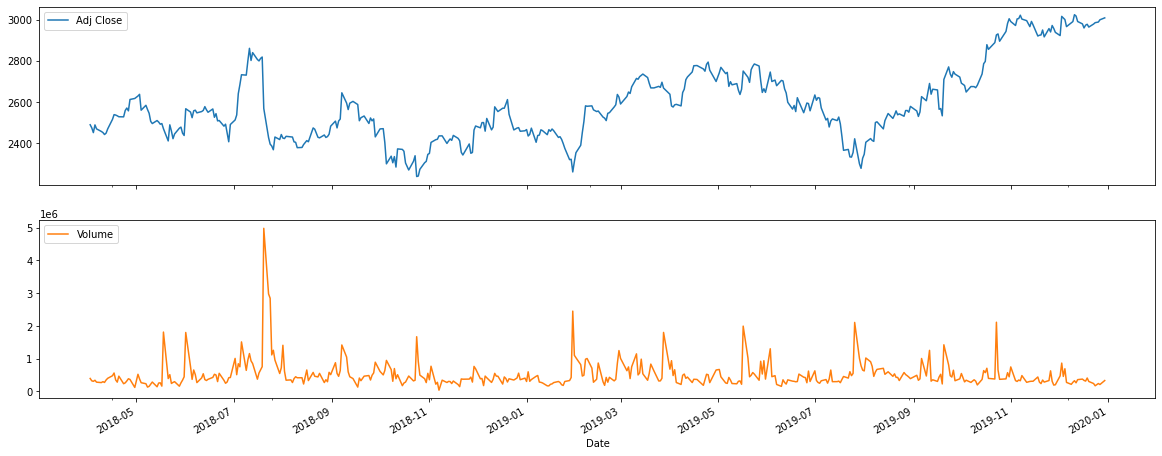

In [306]:
stock= yf.download(tickers='BAJAJ-AUTO.NS',start=start,end=end,rounding=True,auto_adjust=False,progress=False)[['Adj Close','Volume']]
print(stock.plot(subplots=True,figsize=(20,8),kind='line'))
print(plt.legend(loc='upper left'))

In [ ]:
del stock['Volume']
stock.head()

,Adj Close
Date,
2018-04-02,2490.29
2018-04-03,2475.27
2018-04-04,2452.22
2018-04-05,2489.58
2018-04-06,2470.30


In [308]:
y = stock[['Adj Close']].resample('M') \
 .last() \
 .pct_change() \
 .dropna()
 
y.head()

,Adj Close
Date,
2018-05-31,-0.068516
2018-06-30,0.021814
2018-07-31,-0.019482
2018-08-31,0.016591
2018-09-30,-0.020910


In [ ]:
y.index= y.index.strftime('%Y-%m-%d')
y

In [309]:
y.rename(columns={'Adj Close':'retuns'},inplace=True)
y.head()

,Adj Close
Date,
2018-05-31,-0.068516
2018-06-30,0.021814
2018-07-31,-0.019482
2018-08-31,0.016591
2018-09-30,-0.020910


In [ ]:
url=['https://faculty.iima.ac.in/~iffm/Indian-Fama-French-Momentum/']

file=pd.read_csv('/content/20191231_FourFactors_and_Market_Returns_Monthly.csv')
file.tail()

,Month,SMB %,HML %,WML %,Rm %,Rf %,Rm-Rf %
310,201908,0.534308,-4.763220,8.678124,-0.285534,0.429547,-0.712210
311,201909,3.571848,-7.878491,4.201514,4.291048,0.396424,3.880013
312,201910,-4.433875,-3.866972,-5.963407,4.692373,0.404875,4.271045
313,201911,-2.334562,0.012786,-7.226742,0.255699,0.393417,-0.137210
314,201912,-1.031962,-4.163211,5.059692,0.225183,0.409071,-0.183171


In [ ]:
file.head()

,Month,SMB %,HML %,WML %,Rm %,Rf %,Rm-Rf %
0,199310,1.743275,2.336015,5.472541,-1.431621,0.539989,-1.961665
1,199311,-9.550885,-0.495425,13.678909,17.356034,0.542141,16.728924
2,199312,-3.223633,8.570654,0.178863,10.726437,0.325955,10.370179
3,199401,5.183124,-6.113533,-3.875920,20.376547,0.599581,19.665489
4,199402,0.825280,-3.145383,10.144933,4.356845,0.650502,3.683473


In [ ]:
type(file.Month)

file.Month = pd.to_datetime(file.Month,format='%Y%m')


In [ ]:
file.tail()

,Month,SMB %,HML %,WML %,Rm %,Rf %,Rm-Rf %
310,2019-08-01,0.534308,-4.763220,8.678124,-0.285534,0.429547,-0.712210
311,2019-09-01,3.571848,-7.878491,4.201514,4.291048,0.396424,3.880013
312,2019-10-01,-4.433875,-3.866972,-5.963407,4.692373,0.404875,4.271045
313,2019-11-01,-2.334562,0.012786,-7.226742,0.255699,0.393417,-0.137210
314,2019-12-01,-1.031962,-4.163211,5.059692,0.225183,0.409071,-0.183171


In [ ]:
file.columns

Index(['Month', 'SMB %', 'HML %', 'WML %', 'Rm %', 'Rf %', 'Rm-Rf %'], dtype='object')

In [ ]:
file.set_index('Month',inplace=True)

In [ ]:
len(y)
len(file[(file.index > '2018-04') & (file.index <='2019-12')])

20

In [ ]:
y.sample(5)

,retuns
Date,
2018-07-31,-0.019482
2018-11-30,0.058601
2019-04-30,0.011971
2018-08-31,0.016591
2019-03-31,0.016617


In [ ]:
file1=file[(file.index > '2018-04') & (file.index <='2019-12')]

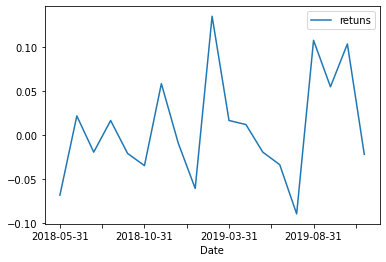

In [310]:
# file2=y[(y.index > '2018-04') & (y.index <='2019-12')]
file2.plot.line()

In [ ]:
# file1.join(other=file2[['retuns']])

In [ ]:
file2.index=file2.index.astype(dtype='datetime64[ns]')
file2.index

DatetimeIndex(['2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [ ]:
file1.index

DatetimeIndex(['2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01'],
              dtype='datetime64[ns]', name='Month', freq=None)

In [ ]:
file1.to_csv('file1.csv')
from google.colab import files
files.download("file1.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
file2.to_csv('file2.csv')
from google.colab import files
files.download("file2.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
'/content/file100.csv'

fama=pd.read_csv('/content/file100.csv')
fama.head()

,Month,SMB %,HML %,WML %,Rm %,Rf %,Rm-Rf %,retuns
0,5/1/2018,-4.623288,-3.524657,5.082766,-2.622046,0.539234,-3.145077,-0.068516
1,6/1/2018,-6.089649,-3.565700,1.980390,-2.507040,0.529407,-3.021213,0.021814
2,7/1/2018,-1.731478,-0.975832,0.367702,5.540432,0.559189,4.954825,-0.019482
3,8/1/2018,-1.415047,0.788953,2.463445,3.809283,0.550567,3.241730,0.016591
4,9/1/2018,-4.238582,-10.872114,8.466376,-9.315389,0.485245,-9.755837,-0.020910


In [ ]:
fama.columns
fama.set_index('Month',inplace=True)
fama=fama.dropna()
fama

,SMB %,HML %,WML %,Rm %,Rf %,Rm-Rf %,retuns
Month,,,,,,,
5/1/2018,-4.623288,-3.524657,5.082766,-2.622046,0.539234,-3.145077,-0.068516
6/1/2018,-6.089649,-3.565700,1.980390,-2.507040,0.529407,-3.021213,0.021814
7/1/2018,-1.731478,-0.975832,0.367702,5.540432,0.559189,4.954825,-0.019482
8/1/2018,-1.415047,0.788953,2.463445,3.809283,0.550567,3.241730,0.016591
9/1/2018,-4.238582,-10.872114,8.466376,-9.315389,0.485245,-9.755837,-0.020910
10/1/2018,0.288421,10.716739,-4.145208,-4.079893,0.570849,-4.625649,-0.034883
11/1/2018,0.924063,-4.383747,3.870432,3.214088,0.534237,2.666320,0.058601
12/1/2018,-0.907086,4.948087,-4.989700,1.205244,0.519250,0.682608,-0.009303
1/1/2019,-3.999746,-2.280333,5.759911,-2.682006,0.592791,-3.256334,-0.060882


In [ ]:
fama.columns
fama.columns=['SMB', 'HML', 'WML', 'Rm', 'Rf', 'Rm-Rf','Ret']
fama.columns
fama.head()

In [ ]:
fama.loc[:, fama.columns != 'Ret'] /= 100

In [ ]:
fama['excess_ret']=fama.Ret-fama.Rf
fama.head()

,SMB,HML,WML,Rm,Rf,Rm-Rf,Ret,excess_ret
Month,,,,,,,,
5/1/2018,-0.000462,-0.000352,0.000508,-0.000262,0.000054,-0.000315,-0.068516,-0.068570
6/1/2018,-0.000609,-0.000357,0.000198,-0.000251,0.000053,-0.000302,0.021814,0.021761
7/1/2018,-0.000173,-0.000098,0.000037,0.000554,0.000056,0.000495,-0.019482,-0.019538
8/1/2018,-0.000142,0.000079,0.000246,0.000381,0.000055,0.000324,0.016591,0.016536
9/1/2018,-0.000424,-0.001087,0.000847,-0.000932,0.000049,-0.000976,-0.020910,-0.020959


#CARHART'S OR FAMA FRANCH 4 FACTOR MODEL 

---


######'The underlying assumption of this extension is that, within a short period of time, a winner stock will remain a winner, while a loser will remain a loser.An example of a criterion for classifying winners and losers could be the last 12-months cumulative total returns. After identifying the two groups, we long the winners and short the losers within a certain holding period.'


In [ ]:
import statsmodels.formula.api as smf

four_factor_model= smf.ols(formula='excess_ret~Rm	+SMB+WML+HML',data=fama).fit()

print(four_factor_model.summary())

                            OLS Regression Results                            
Dep. Variable:             excess_ret   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     2.149
Date:                Wed, 24 Nov 2021   Prob (F-statistic):              0.128
Time:                        20:04:03   Log-Likelihood:                 31.114
No. Observations:                  19   AIC:                            -52.23
Df Residuals:                      14   BIC:                            -47.51
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0111      0.019      0.596      0.5

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


In [ ]:
# WML =  The momentum factor (WML; Winners Minus Losers) measures the excess returns of the
# winner stocks over the loser stocks in the past 12 months